# Exploring-Household-Level-Economics-In-The-Philippines
## Using cluster analysis in Python to explore consumption patterns and purchasing decisions in Filipino household data

### Importing and Exploring the Data
First, I wanted to import and explore the dataset to better know what information I had to work with. The dataset has a good number of observations, which generally improves eventual accuracy in predictive performance, though more observations also means I'll likely have to do dimensionality reduction on the set, as k-means analysis has an O(nk) cost function. Also, the set has 60 features. I'll want to narrow this down to a much smaller number. For this analysis I will focus only on consumption patterns

In [42]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Import dataset
data = pd.read_csv("Family_Income_and_Expenditure.csv")
print "Dataset has {} households with {} features each.".format(*data.shape)

Dataset has 41544 households with 60 features each.


In [43]:
#replace spaces with underscores and list column names with their data types
data.columns = [c.replace(' ', '_') for c in data.columns]
list(data.columns.values)
data.dtypes

Total_Household_Income                            int64
Region                                           object
Total_Food_Expenditure                            int64
Main_Source_of_Income                            object
Agricultural_Household_indicator                  int64
Bread_and_Cereals_Expenditure                     int64
Total_Rice_Expenditure                            int64
Meat_Expenditure                                  int64
Total_Fish_and__marine_products_Expenditure       int64
Fruit_Expenditure                                 int64
Vegetables_Expenditure                            int64
Restaurant_and_hotels_Expenditure                 int64
Alcoholic_Beverages_Expenditure                   int64
Tobacco_Expenditure                               int64
Clothing,_Footwear_and_Other_Wear_Expenditure     int64
Housing_and_water_Expenditure                     int64
Imputed_House_Rental_Value                        int64
Medical_Care_Expenditure                        

In [44]:
# Extract variables for food expenditure and family size
df = data[['Total_Food_Expenditure', 'Bread_and_Cereals_Expenditure', 
           'Total_Rice_Expenditure', 'Meat_Expenditure', 
           'Total_Fish_and__marine_products_Expenditure', 'Fruit_Expenditure', 
           'Vegetables_Expenditure', 'Alcoholic_Beverages_Expenditure',
           'Total_Household_Income', 'Total_Number_of_Family_members']]

display(df.describe())
print "Dataset has {} samples with {} features each.".format(*df.shape)

,Total_Food_Expenditure,Bread_and_Cereals_Expenditure,Total_Rice_Expenditure,Meat_Expenditure,Total_Fish_and__marine_products_Expenditure,Fruit_Expenditure,Vegetables_Expenditure,Alcoholic_Beverages_Expenditure,Total_Household_Income,Total_Number_of_Family_members
count,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,4.154400e+04,41544.000000
mean,85099.158194,25133.723642,18195.825005,10540.072574,10529.318337,2550.474990,5006.918568,1085.068121,2.475556e+05,4.635182
std,51637.947682,13466.482984,11727.224350,10497.727757,7812.201613,2969.752879,3300.175236,2174.431913,2.868805e+05,2.280252
min,2947.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.128500e+04,1.000000
25%,51017.250000,16556.000000,11020.000000,3353.750000,5504.000000,1024.750000,2873.000000,0.000000,1.048950e+05,3.000000
50%,72985.500000,23324.000000,16620.000000,7332.500000,8695.000000,1820.000000,4314.000000,270.000000,1.640795e+05,4.000000
75%,105635.500000,31439.000000,23920.000000,14292.000000,13388.000000,3100.000000,6304.250000,1299.250000,2.911385e+05,6.000000
max,827565.000000,765864.000000,758326.000000,261566.000000,188208.000000,273769.000000,74800.000000,59592.000000,1.181599e+07,26.000000


Dataset has 41544 samples with 10 features each.


In [45]:
# Check if family size, total food expenditure, or total household income
# are correlated with expenditures

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import train_test_split

cortest_variables = ['Total_Number_of_Family_members', 'Total_Food_Expenditure',
                   'Total_Household_Income']
for i in cortest_variables:
    new_data = df.drop([i], axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(new_data, 
                                                    df[i], 
                                                    test_size = 0.25, random_state = 23)
    regressor = DecisionTreeRegressor(random_state=42)
    dtr = regressor.fit(X_train,y_train)
    score = cross_val_score(regressor, new_data, df[i], cv=10)
    print("Accuracy of " + i +" as predictor of other expenditures: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy of Total_Number_of_Family_members as predictor of other expenditures: 0.02 (+/- 0.10)
Accuracy of Total_Food_Expenditure as predictor of other expenditures: 0.63 (+/- 0.14)
Accuracy of Total_Household_Income as predictor of other expenditures: -0.15 (+/- 0.36)


/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  import sys


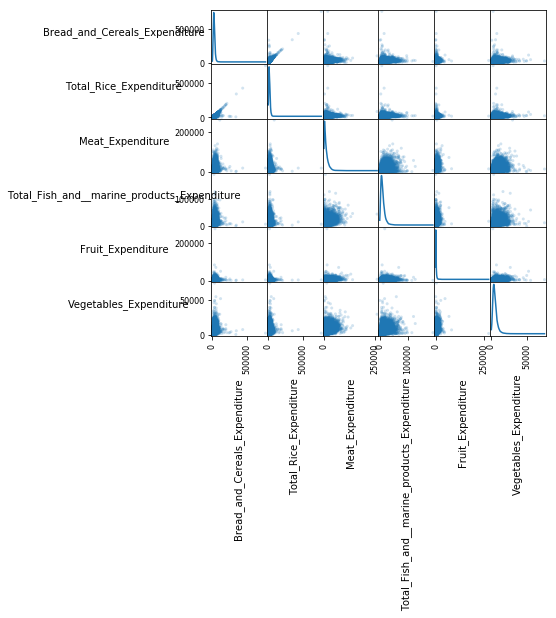

In [46]:
# Run scatter matrix on food expenditure variables to check for correlations
from pandas.plotting import scatter_matrix
scatter_df = df[['Bread_and_Cereals_Expenditure', 
           'Total_Rice_Expenditure', 'Meat_Expenditure', 
           'Total_Fish_and__marine_products_Expenditure', 'Fruit_Expenditure', 
           'Vegetables_Expenditure']]
scatter = pd.scatter_matrix(scatter_df, alpha=0.2, figsize=(6, 6), diagonal='kde')
n = len(scatter_df.columns)
for x in range(n):
    for y in range(n):
        ax = scatter[x, y] 
        ax.xaxis.label.set_rotation(90)
        ax.yaxis.label.set_rotation(0)
        ax.yaxis.labelpad = 50

In [ ]:

df[['Total_Food_Expenditure']].div(df.Total_Number_of_Family_members, axis=0)



Once again, this is far too many features. For now, we will focus on differences in diet with `Total_Food_Expenditure`, `Bread_and_Cereals_Expenditure`, `Total_Rice_Expenditure`, `Meat_Expenditure`, `Total_Fish_and__marine_products_Expenditure`, `Fruit_Expenditure`, `Vegetables_Expenditure `, `Alcoholic_Beverages_Expenditure`. I may also compare these to `Region`, `Total_Household_Income`, `Total_Number_of_Family_members`, and `Household_Head_Occupation` once the clusters are calculated to see how the clusters compare across these metrics. 

In [32]:
#shrink dataframe to only the variables we will consider in this analysis
df = data[['Total_Food_Expenditure', 'Bread_and_Cereals_Expenditure', 
           'Total_Rice_Expenditure', 'Meat_Expenditure', 
           'Total_Fish_and__marine_products_Expenditure', 'Fruit_Expenditure', 
           'Vegetables_Expenditure', 'Alcoholic_Beverages_Expenditure',
           'Region', 'Total_Household_Income', 'Total_Number_of_Family_members',
           'Household_Head_Occupation']]
display(df.describe())

print "Wholesale customers dataset has {} samples with {} features each.".format(*df.shape)

,Total_Food_Expenditure,Bread_and_Cereals_Expenditure,Total_Rice_Expenditure,Meat_Expenditure,Total_Fish_and__marine_products_Expenditure,Fruit_Expenditure,Vegetables_Expenditure,Alcoholic_Beverages_Expenditure,Total_Household_Income,Total_Number_of_Family_members
count,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,4.154400e+04,41544.000000
mean,85099.158194,25133.723642,18195.825005,10540.072574,10529.318337,2550.474990,5006.918568,1085.068121,2.475556e+05,4.635182
std,51637.947682,13466.482984,11727.224350,10497.727757,7812.201613,2969.752879,3300.175236,2174.431913,2.868805e+05,2.280252
min,2947.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.128500e+04,1.000000
25%,51017.250000,16556.000000,11020.000000,3353.750000,5504.000000,1024.750000,2873.000000,0.000000,1.048950e+05,3.000000
50%,72985.500000,23324.000000,16620.000000,7332.500000,8695.000000,1820.000000,4314.000000,270.000000,1.640795e+05,4.000000
75%,105635.500000,31439.000000,23920.000000,14292.000000,13388.000000,3100.000000,6304.250000,1299.250000,2.911385e+05,6.000000
max,827565.000000,765864.000000,758326.000000,261566.000000,188208.000000,273769.000000,74800.000000,59592.000000,1.181599e+07,26.000000


Wholesale customers dataset has 41544 samples with 12 features each.


Features associated with money and fiannces usually need to be normalized, especially since they could have an adverse impact on distance measures used for clustering later on. I ran all integer features as histograms to check their distributions to see if a log transformation made sense. Most showed heavily skewed distributions, like `Meat_Expenditure`. However, `Total Number of Family members` showed a fairly normal-ish distribution already. 

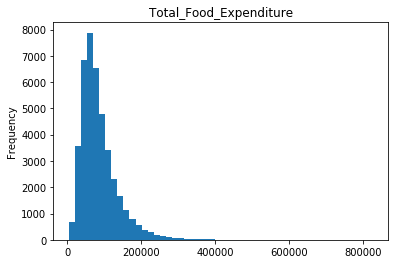

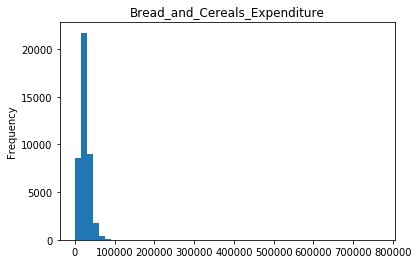

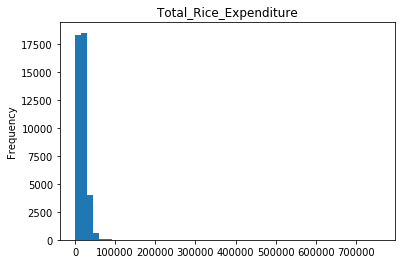

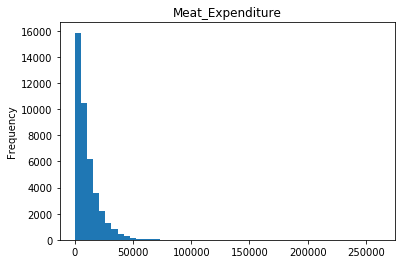

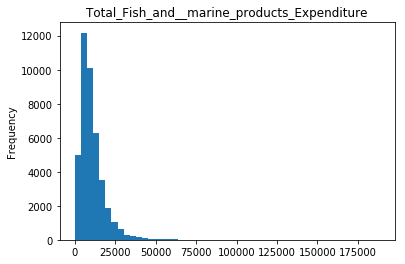

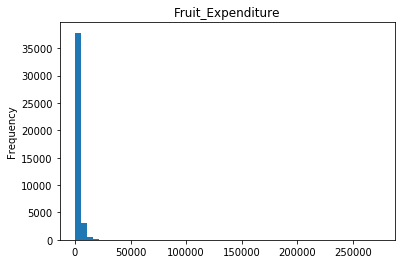

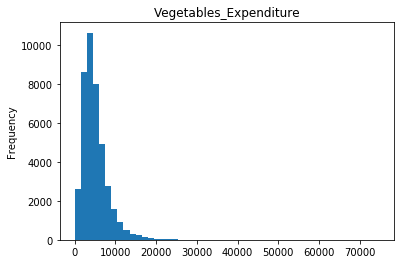

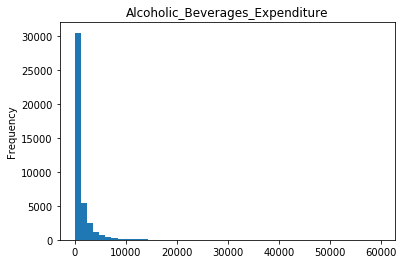

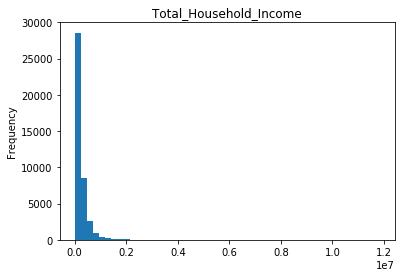

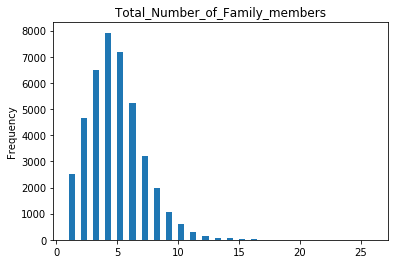

In [33]:
#Check distributions of integer data
countable = list(df.select_dtypes(include=['int64']).columns)

for i in countable:
    df[i].plot(kind='hist', bins = 50)
    plt.title(i)
    plt.show()

I decided to transform all integer-type variable distributions into a logarithmic scale, as often helps with financial data.

In [34]:
#One-hot encode object variables
#df = pd.get_dummies(df, columns=["Region", "Household_Head_Occupation"],
                    #prefix=["Region", "Occupation"])
list(df.columns.values)
df.dtypes

Total_Food_Expenditure                          int64
Bread_and_Cereals_Expenditure                   int64
Total_Rice_Expenditure                          int64
Meat_Expenditure                                int64
Total_Fish_and__marine_products_Expenditure     int64
Fruit_Expenditure                               int64
Vegetables_Expenditure                          int64
Alcoholic_Beverages_Expenditure                 int64
Region                                         object
Total_Household_Income                          int64
Total_Number_of_Family_members                  int64
Household_Head_Occupation                      object
dtype: object

/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


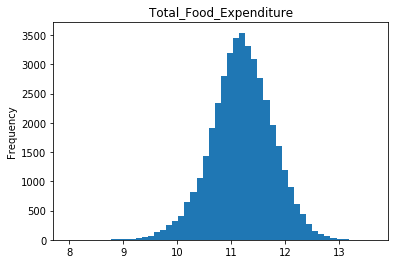

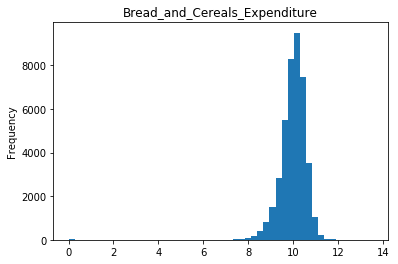

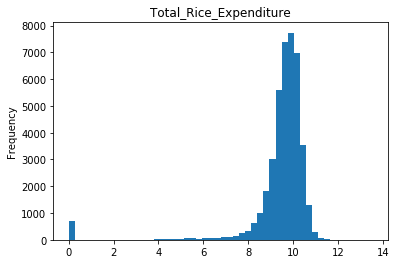

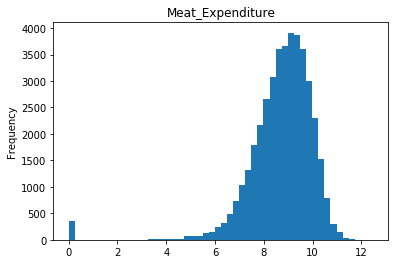

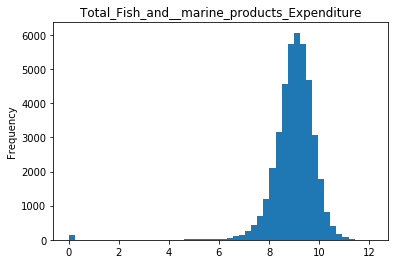

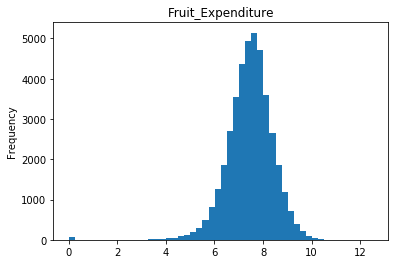

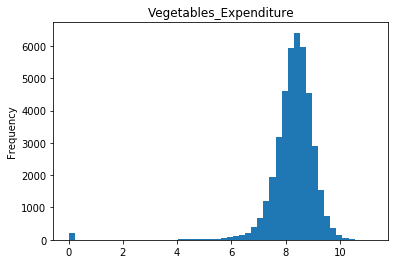

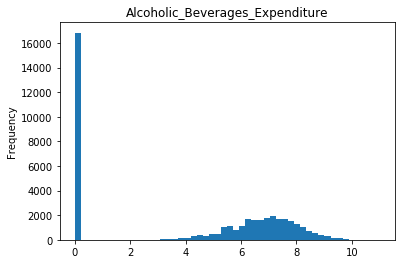

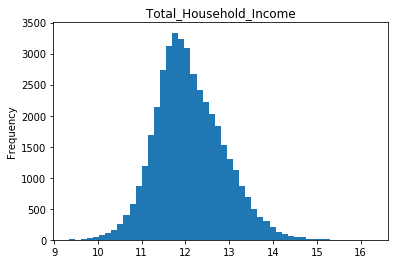

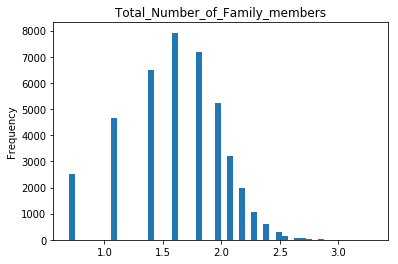

In [35]:
#convert integer features to logarithmic scale and view their resulting distributions
log_df = df

for i in countable:
    log_df[i] = np.log(log_df[i] + 1)
    log_df[i].plot(kind='hist', bins = 50)
    plt.title(i)
    plt.show()

The large number of zero values outside the distributions for many variables indicate a sparse array. I may want to use spherical k-means or use dimensionality reduction.

In [40]:
#Create subset of log_df dataframe that only includes the parameters we will use for segmenting
log_df_params = log_df[['Bread_and_Cereals_Expenditure', 
                    'Total_Rice_Expenditure',
                    'Meat_Expenditure', 'Total_Fish_and__marine_products_Expenditure',
                    'Fruit_Expenditure', 
                    'Vegetables_Expenditure']]
log_income = np.log(df['Total_Household_Income']) + 1
log_total_food = np.log(df['Total_Food_Expenditure'])
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
projected = pca.fit_transform(log_df_params)
print(log_df_params.shape)
print(projected.shape)

(41544, 6)
(41544, 2)


In [43]:
#pd.scatter_matrix(log_df_params)

plt.scatter(projected[:, 0], projected[:, 1], projected[:, 2]
            c=log_total_food, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 3))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.zlabel('component 3')
plt.colorbar();

SyntaxError: invalid syntax (<ipython-input-43-5a6d36e881b0>, line 4)